In [ ]:
import sys                                   #1
import pandas as pd                          #2
import matplotlib                            #3
import numpy as np                           #4           
import scipy as sp                           #5
import IPython                               #6
import sklearn                               #7
from scipy import sparse
import matplotlib.pyplot as plt

from IPython.display import display
import mglearn


In [32]:
# dans la commande : pip install  xlrd
#import xlrd
#workbook = xlrd.open_workbook("student/student_mat.csv")


# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

Exemple de Projets sur ces données :


   1) TACHE DE REGRESSION : SUR LES NOTES FINALES (G3)!



In [3]:
#df2 = pd.read_csv('student/studentpor.csv',  delimiter=';') # Eleves qui font le portugal 

In [4]:
# Eleves qui font les maths 
df1= pd.read_csv('student/studentmat.csv',  delimiter=';') #df1.columns
df1_target= df1.G3 
del df1 ['G3'] # ou df.drop("G3", axis=1)
df1_data = df1

df1_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [5]:
data=pd.get_dummies(df1_data) # encodage des variable categoricielles: 3
data.columns 

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [6]:
#print(df1_data) #[395 rows x 32 columns]
#print(data)    # [95 rows x 58 columns]

In [7]:
from sklearn.model_selection import train_test_split 
x_train, x_test , y_train, y_test = train_test_split (data , df1_target, random_state= 0)


1. K plus proche voisin pour la regression! 

In [8]:
from sklearn.neighbors import KNeighborsRegressor
model1=KNeighborsRegressor(n_neighbors=3)
model1.fit(x_train, y_train )
print("train score : {:.4f}".format(model1.score(x_train, y_train)))
print("test score : {:.4f}".format(model1.score(x_test, y_test)))

train score : 0.9105
test score : 0.8298


2. Arbre de decision pour la regression

 3. Regression lineaire  ! 

Exemple 1

In [9]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression() 
model2.fit(x_train, y_train )
print("train score : {:.4f}".format(model2.score(x_train, y_train)))
print("test score : {:.4f}".format(model2.score(x_test, y_test)))

train score : 0.8652
test score : 0.7830


Exemple 2

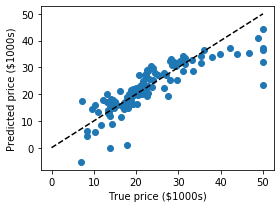

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# matplotlib to visualize the data
import matplotlib.pyplot as plt


data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)


clf = LinearRegression()

# training the model using the feature and label
clf.fit(X_train, y_train)


# making predictions on the test data
predicted = clf.predict(X_test)

expected = y_test


# plotting the best-fit line

plt.figure(figsize=(4, 3))

plt.scatter(expected, predicted)

plt.plot([0, 50], [0, 50], '--k')

plt.axis('tight')

plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

plt.tight_layout()

4 . Regression polynomiale

4.1 Regularisation de Ridge!  avec variation de l hyperparametre alpha

In [10]:
from sklearn.linear_model import Ridge
model3=Ridge(alpha=0.0100).fit(x_train, y_train ) # 1 ,10, 0.1 ....
print("train score : {:.4f}".format(model3.score(x_train, y_train)))
print("test score : {:.4f}".format(model3.score(x_test, y_test)))

train score : 0.8652
test score : 0.7830


4.2 Regularisation de Lasso! avec variation de l hyperparametre alpha

In [11]:
from sklearn.linear_model import Lasso
model4=Lasso(alpha=0.00100).fit(x_train, y_train ) # 1 ,10, 0.1, 0.001 .... plus petit mieux cest cest!
print("train score : {:.4f}".format(model4.score(x_train, y_train)))
print("test score : {:.4f}".format(model4.score(x_test, y_test)))

train score : 0.8652
test score : 0.7834


5. Réseaux de neurones (deep learning) :  quel modele ???